In [175]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

In [176]:
caesarian_df = pd.read_csv("ds/notes/assets/caesarian.csv")
caesarian_df.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,False
1,26,2,0,1,0,True
2,26,2,1,1,0,False
3,28,1,0,2,0,False
4,22,2,0,1,0,True


In [177]:
caesarian_target = pd.DataFrame(caesarian_df['Caesarian'])
caesarian_features = caesarian_df.drop('Caesarian', axis=1)

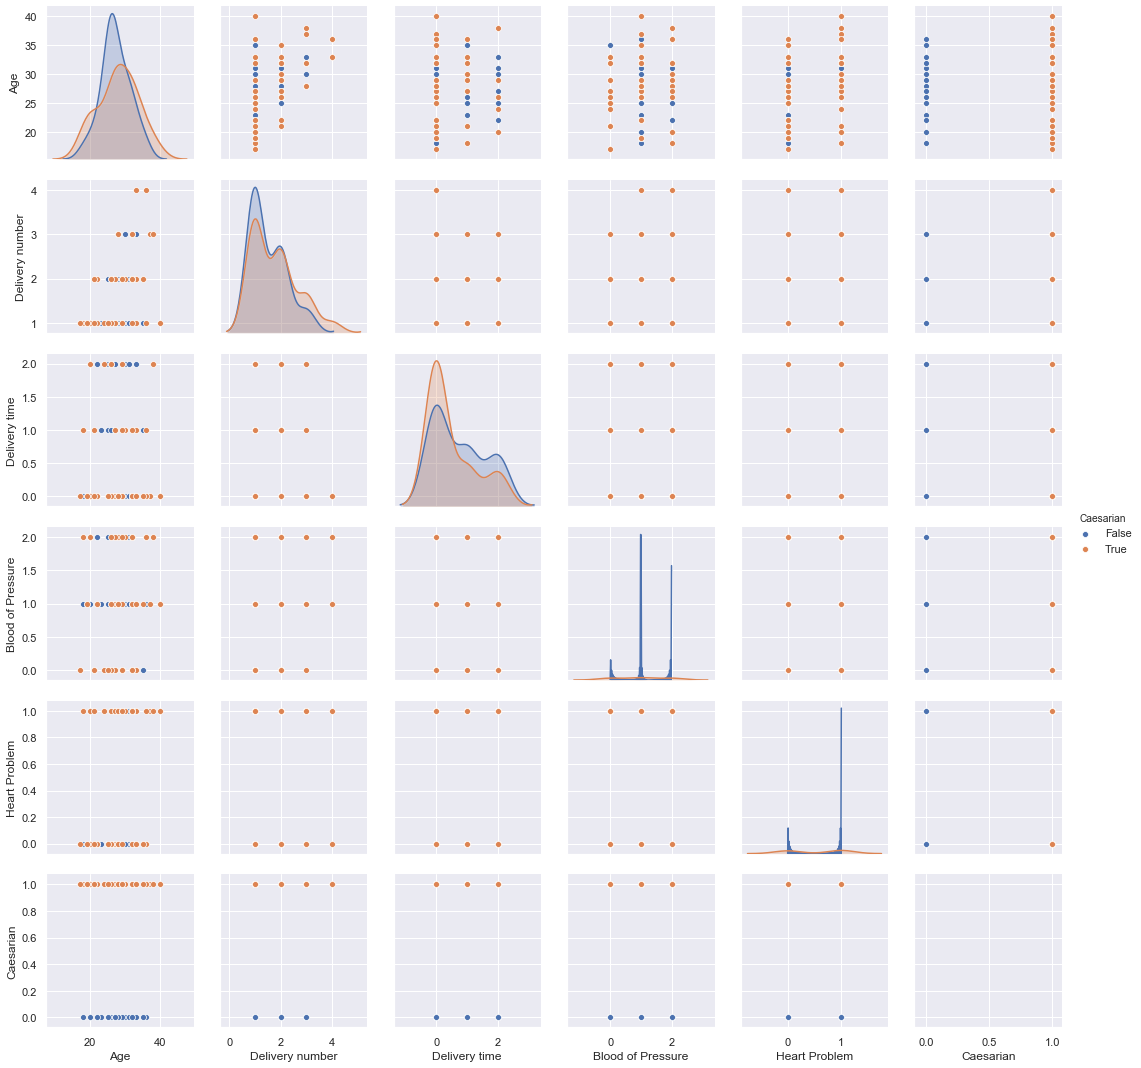

In [178]:
sns.pairplot(caesarian_df, hue="Caesarian")

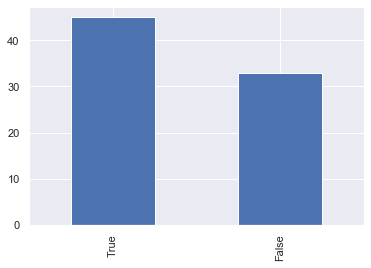

In [179]:
caesarian_df.loc[:,'Caesarian'].value_counts().plot.bar()


All of our independent variables except for age is unimodal. Our independent variable age is multimodal. 
We can identified clusters between variables in our scatter plots except for the scatter where age is one of the variable. 
There seems to be no cluster between age and any other variables in our model. The clusters are related to our decision 
tree model from last assignment. Our data is balanced.


In [180]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(caesarian_features, caesarian_target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [181]:
tree_print(decision_tree,caesarian_features)

if Heart Problem =< 0.5: 
  |then if Age =< 21.5: 
  |  |then if Age =< 18.5: 
  |  |  |then if Age =< 17.5: 
  |  |  |  |then True
  |  |  |  |else False
  |  |  |else True
  |  |else if Delivery number =< 2.5: 
  |  |  |then if Age =< 31.5: 
  |  |  |  |then if Age =< 29.5: 
  |  |  |  |  |then if Age =< 28.5: 
  |  |  |  |  |  |then if Age =< 27.5: 
  |  |  |  |  |  |  |then if Delivery time =< 0.5: 
  |  |  |  |  |  |  |  |then if Age =< 26.5: 
  |  |  |  |  |  |  |  |  |then if Age =< 23.5: 
  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |then True
  |  |  |  |  |  |  |  |  |  |  |else False
  |  |  |  |  |  |  |  |  |  |else if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |then if Delivery number =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then False
  |  |  |  |  |  |  |  |  |  |  |  |  |else False
  |  |  |  |  |  |  |  |  |  |  |  |else if 

In [182]:
predict_array = decision_tree.predict(caesarian_features)
predicted_labels = pd.DataFrame(predict_array)
predicted_labels.columns = ['Caesarian']

In [183]:
predicted_labels.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [184]:
caesarian_target.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [185]:
# check if predicted and target are both the same
predicted_labels.equals(caesarian_target)

False

In [186]:
# Accuracy of predicted model
print(f" The model accuracy is: {accuracy_score(predicted_labels, caesarian_target)}")

 The model accuracy is: 0.9615384615384616


Our new decision tree models does not differ too much from our old model in terms of interpretability. We agree on the major trends/classification we see in the model. In fact, the model accuracy is about the same as the previous lab.